In [1]:
import numpy as np
import sys
import itertools as itertools
sys.path.append("..")
sys.path.append("../..")

import matplotlib.pyplot as plt
from python.Heisenberg import *
from python.DMRG import DMRG
from python.Zippers import MPO_to_Hamiltonian, contract_MPS
from python.Canonical_Form import get_Neumann_entropy
from python.Backend import Backend
from python.Decomposition import EIGH

In [2]:
bk = Backend("numpy")
# bk = Backend("torch")

NKeep = 50
NSweep = 20
Krylov_bases = 5  #* 5 is usually enough
Lanczos_cutoff = 1e-2
iterative_diag = True
two_site = True
verbose = True

# XXZ model

In [6]:
n_sites = 50

ZZ_coupling = 1.0
XY_coupling = 1.0
magnetic_field = 0.0

Hamiltonian = XXZ_model(
    bk=bk, n_sites=n_sites, ZZ_coupling=ZZ_coupling,
    XY_coupling=XY_coupling, magnetic_field=magnetic_field,
)
MPO_transposed = [bk.transpose(ham, (2, 3, 0, 1)) for ham in Hamiltonian]

In [7]:
# """
# Get exact matrix (exponential barrier)
# """

# matrix = MPO_to_Hamiltonian(MPO_transposed, bk=bk)
# eigvals, _ = EIGH(matrix, bk=bk)
# eigvals

In [8]:
ground_energies, ground_times, ground_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = iterative_diag,
    two_site = two_site,
    verbose = verbose,
    tol = 1e-8,
)

# eigvals[0]

L=50 | NKeep=50 | NSweep=20 | diag=True | two=True | Krylov=5 | cutoff=0.01
Iterative diagonalization complete
iter=0 | energy=-21.964776 | time=0js
iter=1 | energy=(-21.97203491054343+0j) | time=1.6079047719977098s
iter=2 | energy=(-21.972034910543293+0j) | time=2.7597615889972076s


In [9]:
ground_energies[-1] / n_sites

(-0.43944069821086584+0j)

In [10]:
1/4-np.log(2)

-0.4431471805599453

/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/home/sungbinlee/miniconda3/envs/latest/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


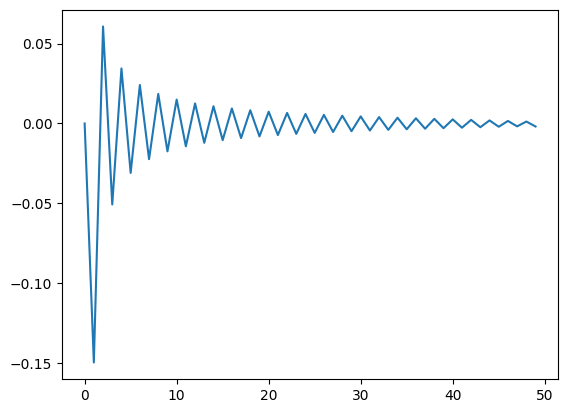

In [11]:
plt.plot(get_spin_correlations(ground_MPS, bk))

In [6]:
excited_energies, excited_times, excited_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = False,
    orthogonal_to_list_of_MPS=[ground_MPS],
    two_site = two_site,
    verbose = verbose,
    tol = 1e-6,
)

# eigvals[1]

L=50 | NKeep=20 | NSweep=10 | diag=False | two=True | Krylov=5 | cutoff=0.01
Random initialization complete
iter=0 | energy=0.10886267 | time=0js
iter=1 | energy=(-37.04476387983776+0j) | time=42.60287311999991s
iter=2 | energy=(-37.05380999711092+0j) | time=85.74550284799989s
iter=3 | energy=(-37.05380999711063+0j) | time=128.04137882999987s


# nn Heisenberg

In [7]:
# bk = Backend("numpy")
bk = Backend("torch")

n_sites = 10

J1 = 1.0
J2 = 1.0

Hamiltonian = nn_Heisenberg_model(
    n_sites=n_sites, J1=J1, J2=J2, bk = bk,
)
MPO_transposed = [bk.transpose(ham, (2, 3, 0, 1)) for ham in Hamiltonian]

In [8]:
"""
Get exact matrix (exponential barrier)
"""

matrix = MPO_to_Hamiltonian(MPO_transposed, bk=bk)
eigvals, _ = EIGH(matrix, bk=bk)
eigvals

tensor([-2.2500, -2.2500, -1.7500,  ...,  3.2500,  4.2500,  4.2500],
       device='cuda:0')

In [9]:
NKeep = 20
NSweep = 10
Krylov_bases = 5 #* 5 is usually enough
Lanczos_cutoff = 1e-2
iterative_diag = True
two_site = True
verbose = True

In [10]:
ground_energies, ground_times, ground_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = iterative_diag,
    two_site = two_site,
    verbose = verbose,
)

eigvals[0]

L=10 | NKeep=20 | NSweep=10 | diag=True | two=True | Krylov=5 | cutoff=0.01
Iterative diagonalization complete
iter=0 | energy=-2.25 | time=0js
iter=1 | energy=(-2.249999999999999+0j) | time=0.16666175600039423s


tensor(-2.2500, device='cuda:0')

In [11]:
excited_energies, excited_times, excited_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = False,
    orthogonal_to_list_of_MPS=[ground_MPS],
    two_site = two_site,
    verbose = verbose,
)

eigvals[1]

L=10 | NKeep=20 | NSweep=10 | diag=False | two=True | Krylov=5 | cutoff=0.01
Random initialization complete
iter=0 | energy=0.070293005 | time=0js
iter=1 | energy=(-2.2499897689419655+0j) | time=0.4362479589999566s
iter=2 | energy=(-2.2499897689419455+0j) | time=0.7653190970004289s


tensor(-2.2500, device='cuda:0')

# XY model

In [12]:
# bk = Backend("numpy")
bk = Backend("torch")

n_sites = 10

J = -1.0
Gamma = 1.0

Hamiltonian = XY_model(
    n_sites=n_sites, J=J, Gamma=Gamma, bk=bk
)
MPO_transposed = [bk.transpose(ham, (2, 3, 0, 1)) for ham in Hamiltonian]

In [13]:
"""
Get exact matrix (exponential barrier)
"""

matrix = MPO_to_Hamiltonian(MPO_transposed, bk=bk)
eigvals, _ = EIGH(matrix, bk=bk)
eigvals

tensor([-5.2848, -4.7515, -4.6613,  ...,  4.6613,  4.7515,  5.2848],
       device='cuda:0')

In [14]:
ground_energies, ground_times, ground_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = iterative_diag,
    two_site = two_site,
    verbose = verbose,
)

eigvals[0]

L=10 | NKeep=20 | NSweep=10 | diag=True | two=True | Krylov=5 | cutoff=0.01
Iterative diagonalization complete
iter=0 | energy=-5.2770168 | time=0js
iter=1 | energy=(-5.2848297738978625+0j) | time=0.24597153300055652s
iter=2 | energy=(-5.284829773897861+0j) | time=0.4381416080004783s


In [15]:
excited_energies, excited_times, excited_MPS = DMRG(
    bk = bk,
    Hamiltonian = Hamiltonian,
    NKeep = NKeep,
    NSweep = NSweep,
    Krylov_bases = Krylov_bases,
    Lanczos_cutoff = Lanczos_cutoff,
    iterative_diag = False,
    orthogonal_to_list_of_MPS=[ground_MPS],
    two_site = two_site,
    verbose = verbose,
)

eigvals[1]

L=10 | NKeep=20 | NSweep=10 | diag=False | two=True | Krylov=5 | cutoff=0.01
Random initialization complete
iter=0 | energy=-0.24445708 | time=0js
iter=1 | energy=(-4.751452233699276+0j) | time=0.5259036799998285s
iter=2 | energy=(-4.751452233699316+0j) | time=0.8774124399997163s


tensor(-4.7515, device='cuda:0')

In [16]:
get_Neumann_entropy(ground_MPS, bk=bk)

tensor([0.1192+0.j, 0.1269+0.j, 0.1280+0.j, 0.1281+0.j, 0.1282+0.j, 0.1281+0.j, 0.1280+0.j,
        0.1269+0.j, 0.1193+0.j], device='cuda:0')

In [17]:
get_Neumann_entropy(excited_MPS, bk=bk)

tensor([0.2302+0.j, 0.4702+0.j, 0.7437+0.j, 0.9564+0.j, 1.0327+0.j, 0.9454+0.j, 0.7271+0.j,
        0.4550+0.j, 0.2232+0.j], device='cuda:0')

In [18]:
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

L = 40
N_keep = 32
sweeps = 10
krylov = 5
gammas = np.linspace(0, 1, 21)
Js     = np.linspace(0.2 ,2, 19)

ModuleNotFoundError: No module named 'tqdm'

In [ ]:
E0  = np.zeros((len(Js), len(gammas)))
gap = np.zeros_like(E0)
SvN = np.zeros_like(E0)

for iJ, J in enumerate(tqdm(Js, desc='J loop')):
    for ig, gamma in enumerate(tqdm(gammas, desc='gamma loop', leave=False)):
        # --- build MPO ------------
        H_MPO = XY_model(n_sites=L, J=J, Gamma=gamma)

        # --- ground state ---------------
        (E_series, _, GS_MPS) = DMRG(
            Hamiltonian = H_MPO,
            NKeep       = N_keep,
            NSweep      = sweeps,
            Krylov_bases= krylov,
            iterative_diag = True,
            two_site    = True,
            verbose     = False,
        )
        E0[iJ, ig] = E_series[-1].real

        # --- first excited state (orthogonalized one further run) ----------
        (E1_series, _, _) = DMRG(
            Hamiltonian = H_MPO,
            NKeep       = N_keep,
            NSweep      = sweeps,
            Krylov_bases= krylov,
            iterative_diag = False,
            two_site    = True,
            orthogonal_to_list_of_MPS = [GS_MPS],  # ⟂ to ground state
            verbose     = False,
        )
        gap[iJ, ig] = (E1_series[-1] - E0[iJ, ig]).real

        # --- mid-chain entanglement entropy -----------
        SvN_chain = get_Neumann_entropy(GS_MPS)
        SvN[iJ, ig] = SvN_chain[L//2 - 1]           # cut at L/2

# --------------------- plotting --------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

titles   = [r'Ground-state energy density $e_0$',
            r'Spectral gap $\Delta$',
            r'Mid-chain entropy $S_{\mathrm{vN}}$']
data     = [E0 / L, gap, SvN]

for ax, dat, title in zip(axes, data, titles):
    im = ax.imshow(dat,
                   origin='lower',
                   extent=[gammas[0], gammas[-1],
                               Js[0],    Js[-1]],
                   aspect='auto')
    ax.set_title(title, fontsize=13)
    ax.set_xlabel(r'$\gamma$')
    ax.set_ylabel(r'$J$')
    fig.colorbar(im, ax=ax, fraction=0.046)

plt.tight_layout()
plt.show()

In [ ]:
import pickle, datetime, pathlib

results = {
    "timestamp"   : datetime.datetime.now().isoformat(),
    "system_size" : L,
    "bond_dim"    : N_keep,
    "sweeps"      : sweeps,
    "gamma_vals"  : gammas,
    "J_vals"      : Js,
    "E0"          : E0,            # ground-state energy
    "gap"         : gap,           # spectral gap
    "SvN"         : SvN,           # mid-chain von-Neumann entropy
}

fname = pathlib.Path(f"XY_phase_diag_L{L}_chi{N_keep}.pkl").as_posix()
with open(fname, "wb") as f:
    pickle.dump(results, f)

print(f"✔  Saved to {fname}")